In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import beta
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]

# beta distribution plotting adapted from
# https://towardsdatascience.com/beta-distribution-intuition-examples-and-derivation-cf00f4db57af

In [2]:
# Data input
day1 = {"GFP": [33, 15, 32, 24], "tdTomato": [6, 10, 20, 6], "Both": [61, 75, 48, 70]}
day5 = {"GFP": [76, 32, 4, 15], "tdTomato": [8, 17, 7, 8], "Both": [16, 51, 89, 77]}
day8_icm = {"GFP": [50, 68, 61.29, 29.58], "tdTomato": [36.11, 8, 22.58, 54.93], "Both": [13.89, 24, 16.13, 15.49]}
day8_te = {"GFP": [53.76, 58, 75, 57.07], "tdTomato": [30.11, 16, 16.25, 17.07], "Both": [16.13, 26, 8.75, 25.85]}

day8both = [(day8_icm["Both"][i]+day8_te["Both"][i])/2 for i in range(4)]

In [3]:
# Sanity check
print([day1["GFP"][i] + day1["tdTomato"][i] + day1["Both"][i] for i in range(4)])
print([day5["GFP"][i] + day5["tdTomato"][i] + day5["Both"][i] for i in range(4)])
print([day8_icm["GFP"][i] + day8_icm["tdTomato"][i] + day8_icm["Both"][i] for i in range(4)])
print([day8_te["GFP"][i] + day8_te["tdTomato"][i] + day8_te["Both"][i] for i in range(4)])

[100, 100, 100, 100]
[100, 100, 100, 100]
[100.0, 100, 100.0, 99.99999999999999]
[100.0, 100, 100.0, 99.99000000000001]


# Plots

In [4]:
data = pd.DataFrame(columns=["#", "Markers", "XCI state", "Day", "Lineage", "% cells"])

tissue = ["Aggregate", "Aggregate", "ICM", "TE"]
day = [1, 5, 8, 8]
marker1 = ["GFP", "tdTomato", "Both"]
marker2 = ["Inactive", "Inactive", "Active"]
arrays = [day1, day5, day8_icm, day8_te]
for i in range(4):
  for k in range(3):
    for j in range(4):
      data.loc[len(data)] = [j, marker1[k], marker2[k], day[i], tissue[i], arrays[i][marker1[k]][j]]

data

,#,Markers,XCI state,Day,Lineage,% cells
0,0,GFP,Inactive,1,Aggregate,33.00
1,1,GFP,Inactive,1,Aggregate,15.00
2,2,GFP,Inactive,1,Aggregate,32.00
3,3,GFP,Inactive,1,Aggregate,24.00
4,0,tdTomato,Inactive,1,Aggregate,6.00
5,1,tdTomato,Inactive,1,Aggregate,10.00
6,2,tdTomato,Inactive,1,Aggregate,20.00
7,3,tdTomato,Inactive,1,Aggregate,6.00
8,0,Both,Active,1,Aggregate,61.00
9,1,Both,Active,1,Aggregate,75.00


## 3 markers

<Axes: xlabel='Day', ylabel='% cells'>

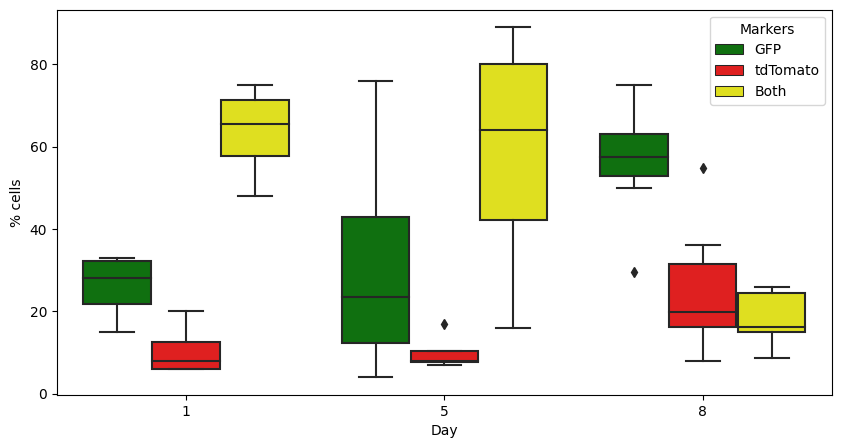

In [5]:
sns.boxplot(x="Day", y="% cells", hue="Markers", data=data, palette=["green", "red", "yellow"])

<Axes: xlabel='Day', ylabel='% cells'>

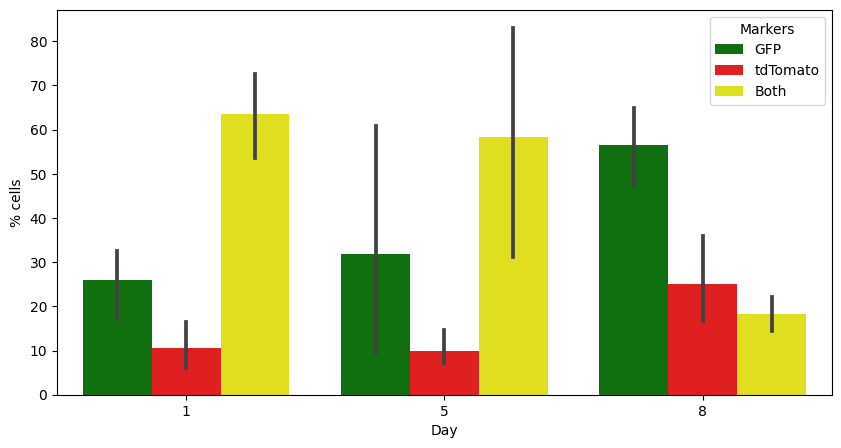

In [6]:
sns.barplot(x="Day", y="% cells", hue="Markers", data=data, palette=["green", "red", "yellow"])

<Axes: xlabel='Day', ylabel='% cells'>

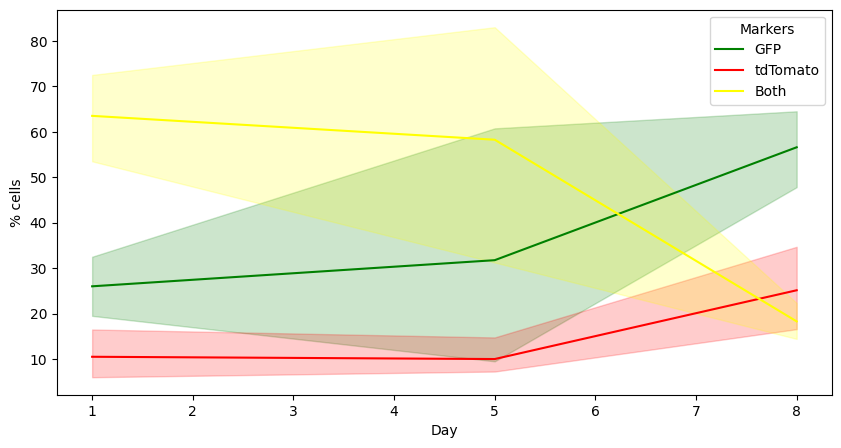

In [7]:
sns.lineplot(x="Day", y="% cells", hue="Markers", data=data, palette=["green", "red", "yellow"])

## Active vs Inactive

<Axes: xlabel='Day', ylabel='% cells'>

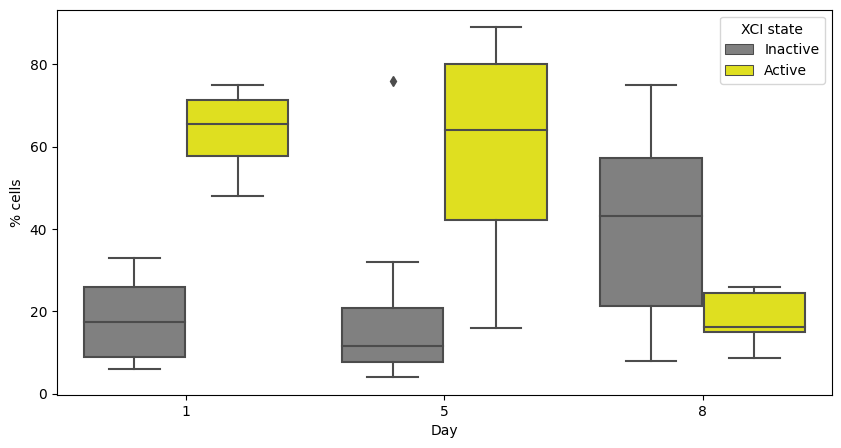

In [8]:
sns.boxplot(x="Day", y="% cells", hue="XCI state", data=data, palette=["grey", "yellow"])

<Axes: xlabel='Day', ylabel='% cells'>

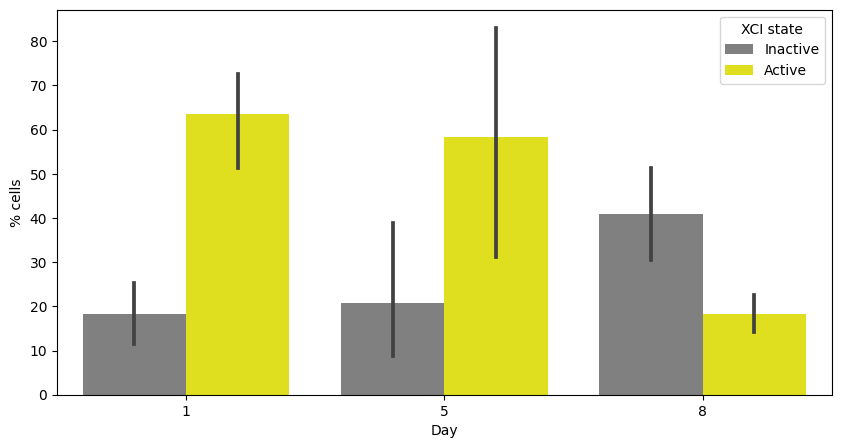

In [9]:
sns.barplot(x="Day", y="% cells", hue="XCI state", data=data, palette=["grey", "yellow"])

<Axes: xlabel='Day', ylabel='% cells'>

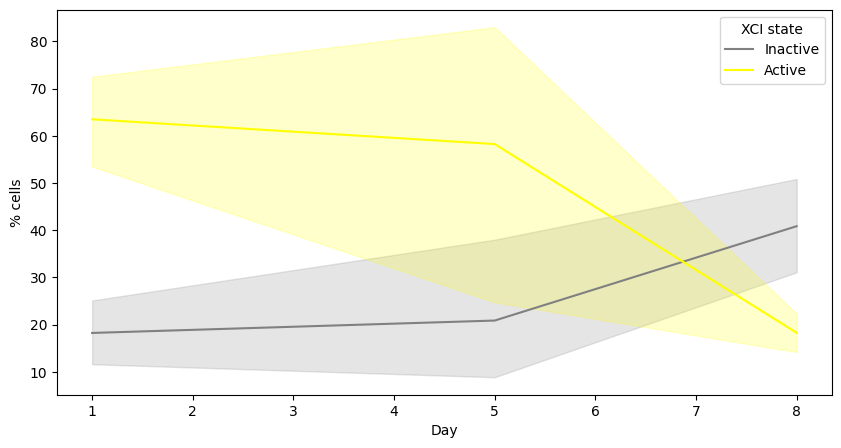

In [10]:
sns.lineplot(x="Day", y="% cells", hue="XCI state", data=data, palette=["grey", "yellow"])

## TE vs ICM

<Axes: xlabel='Lineage', ylabel='% cells'>

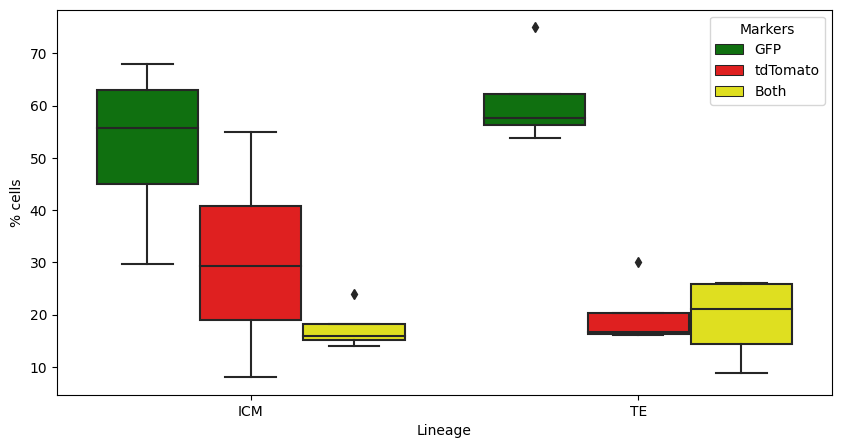

In [11]:
sns.boxplot(x="Lineage", y="% cells", hue="Markers", data=data[data.Lineage!="Aggregate"], palette=["green", "red", "yellow"])

<Axes: xlabel='Lineage', ylabel='% cells'>

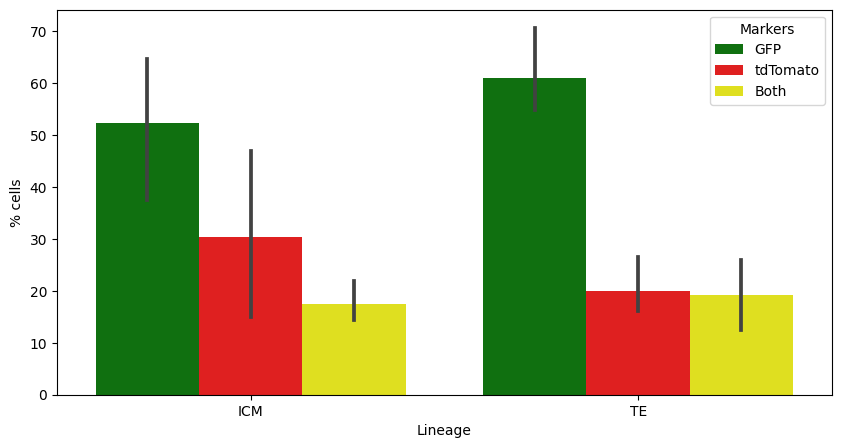

In [12]:
sns.barplot(x="Lineage", y="% cells", hue="Markers", data=data[data.Lineage!="Aggregate"], palette=["green", "red", "yellow"])

(0.0, 70.0)

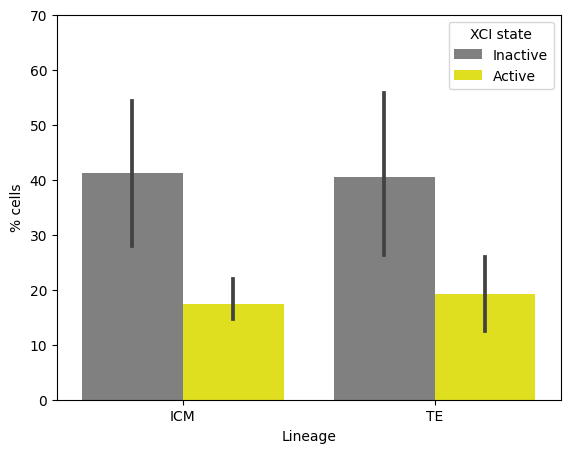

In [13]:
fig, ax = plt.subplots(figsize=(6.5,5))
sns.barplot(x="Lineage", y="% cells", hue="XCI state", data=data[data.Lineage!="Aggregate"], palette=["grey", "yellow"])
ax.set_ylim(0, 70)

<ipython-input-14-0d1a640a9ad4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_xci = data[(data.Lineage!="Aggregate")&(data.Markers!="Both")].groupby(["Lineage", "#"]).sum()["% cells"].values


(0.0, 1.0)

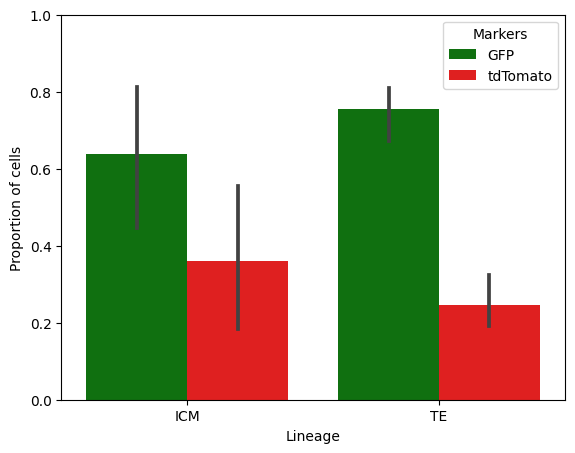

In [14]:
total_xci = data[(data.Lineage!="Aggregate")&(data.Markers!="Both")].groupby(["Lineage", "#"]).sum()["% cells"].values
gfp = data.loc[(data.Lineage!="Aggregate")&(data.Markers=="GFP")]
tdtomato = data.loc[(data.Lineage!="Aggregate")&(data.Markers=="tdTomato")]

data2g = pd.DataFrame({"Markers":gfp.Markers, "Lineage":gfp.Lineage, "Proportion of cells":gfp["% cells"].values/total_xci})
data2t = pd.DataFrame({"Markers":tdtomato.Markers, "Lineage":tdtomato.Lineage, "Proportion of cells":tdtomato["% cells"].values/total_xci})

data2 = pd.concat([data2g, data2t])


fig, ax = plt.subplots(figsize=(6.5,5))
sns.barplot(x="Lineage", y="Proportion of cells", hue="Markers", data=data2, palette=["green", "red"])
ax.set_ylim(0, 1)

# is there a bias for inactivation of the GFP allele?

Null hypothesis: the proportion of cells that inactivate the GFP allele is equal to 0.5

## Beta distributions based on GFP/(total) and tdTomato/(total)

In [15]:
to_plot2 = []
for i in [day1, day5, day8_icm, day8_te]:
  to_plot2.append([np.sum([i["GFP"][j]/10 for j in range(4)]), np.sum([i["tdTomato"][j]/10 for j in range(4)])])
to_plot2

[[10.4, 4.2],
 [12.700000000000001, 4.0],
 [20.887, 12.161999999999999],
 [24.383, 7.9430000000000005]]

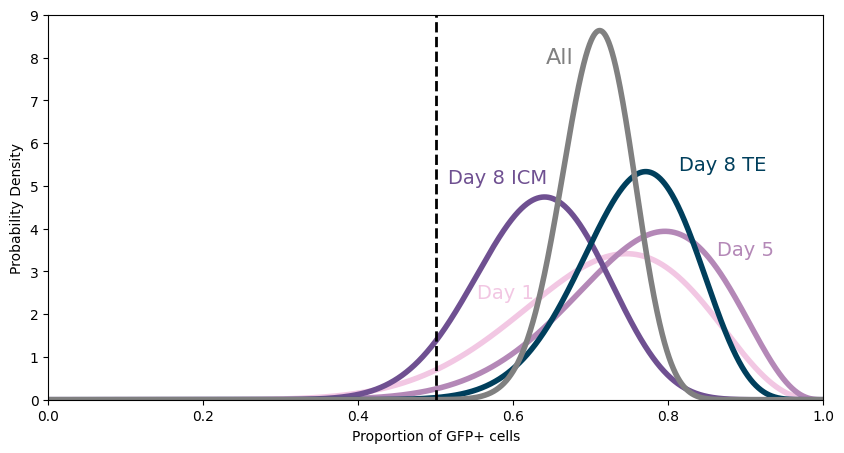

In [16]:
# Bell shape
x = np.linspace(0, 1, 10000)
yd1 = beta.pdf(x, to_plot2[0][0], to_plot2[0][1])
yd5 = beta.pdf(x, to_plot2[1][0], to_plot2[1][1])
yd8i = beta.pdf(x, to_plot2[2][0], to_plot2[2][1])
yd8t = beta.pdf(x, to_plot2[3][0], to_plot2[3][1])

yall = beta.pdf(x, np.sum([to_plot2[i][0] for i in range(4)]),
                np.sum([to_plot2[i][1] for i in range(4)]))

#plt.title("PDF of the proportion of GFP+ cells out of all cells expressing a single allele", fontsize=20)

colors = ["#f2c7e3", "#b488b7", "#6f5091", "#003f5c"]

#plt.title("PDF of proportion of GFP+/tdTomato+ cells out of the total", fontsize=20)
plt.xlabel("Proportion of GFP+ cells")
plt.ylabel("Probability Density")
plt.plot(x, yd1, linewidth=4, color=colors[0])
plt.annotate("Day 1", xy=(0.59, 2.5), size = 14, ha='center', va='center', color=colors[0])
plt.plot(x, yd5, linewidth=4, color=colors[1])
plt.annotate("Day 5", xy=(0.9, 3.5), size = 14, ha='center', va='center', color=colors[1])
plt.plot(x, yd8i, linewidth=4, color=colors[2])
plt.annotate("Day 8 ICM", xy=(0.58, 5.2), size = 14, ha='center', va='center', color=colors[2])
plt.plot(x, yd8t, linewidth=4, color=colors[3])
plt.annotate("Day 8 TE", xy=(0.87, 5.5), size = 14, ha='center', va='center', color=colors[3])

plt.plot(x, yall, linewidth=4, color='gray')
plt.annotate("All", xy=(0.66, 8), size = 16, ha='center', va='center', color='gray')

plt.plot([0.5 for i in range(100)], np.linspace(0, 9, 100), linewidth=2, color='black', linestyle='dashed')

plt.xlim([0, 1])
plt.ylim([0, 9])
plt.show()

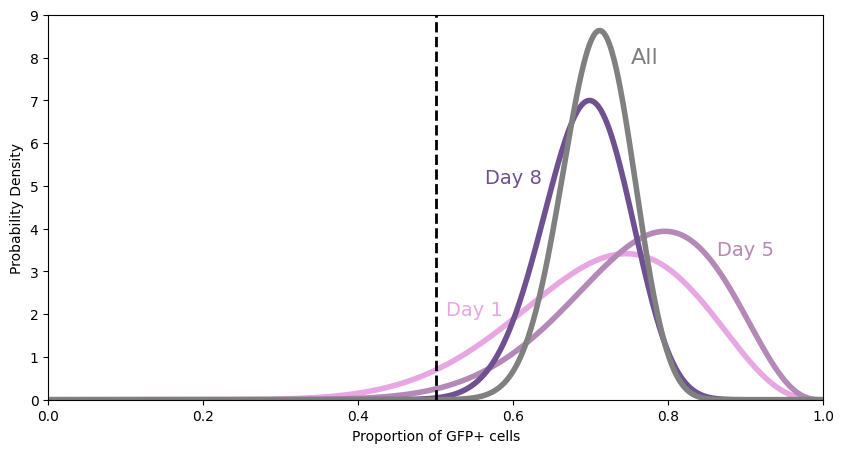

In [17]:
# Bell shape
x = np.linspace(0, 1, 10000)
yd1 = beta.pdf(x, to_plot2[0][0], to_plot2[0][1])
yd5 = beta.pdf(x, to_plot2[1][0], to_plot2[1][1])
yd8 = beta.pdf(x, to_plot2[3][0]+to_plot2[2][0], to_plot2[3][1]+to_plot2[2][1])

yall = beta.pdf(x, np.sum([to_plot2[i][0] for i in range(4)]),
                np.sum([to_plot2[i][1] for i in range(4)]))

#plt.title("PDF of the proportion of GFP+ cells out of all cells expressing a single allele", fontsize=20)

colors = ["#e8a7e2", "#b488b7", "#6f5091", "#003f5c"]

#plt.title("PDF of proportion of GFP+/tdTomato+ cells out of the total", fontsize=20)
plt.xlabel("Proportion of GFP+ cells")
plt.ylabel("Probability Density")
plt.plot(x, yd1, linewidth=4, color=colors[0])
plt.annotate("Day 1", xy=(0.55, 2.1), size = 14, ha='center', va='center', color=colors[0])
plt.plot(x, yd5, linewidth=4, color=colors[1])
plt.annotate("Day 5", xy=(0.9, 3.5), size = 14, ha='center', va='center', color=colors[1])
plt.plot(x, yd8, linewidth=4, color=colors[2])
plt.annotate("Day 8", xy=(0.6, 5.2), size = 14, ha='center', va='center', color=colors[2])

plt.plot(x, yall, linewidth=4, color='gray')
plt.annotate("All", xy=(0.77, 8), size = 16, ha='center', va='center', color='gray')

plt.plot([0.5 for i in range(100)], np.linspace(0, 9, 100), linewidth=2, color='black', linestyle='dashed')

plt.xlim([0, 1])
plt.ylim([0, 9])
plt.show()

## Beta distributions based on mean and variance

In [18]:
day8 = dict()
alld = dict()
for i in ["GFP", "tdTomato", "Both"]:
  day8[i] = day8_icm[i] + day8_te[i]
  alld[i] = day8_icm[i] + day8_te[i] + day1[i] + day5[i]
to_plot = []
for i in [day1, day5, day8, alld]:
  k = [i["GFP"][j]/(i["GFP"][j]+i["tdTomato"][j]) for j in range(len(i["GFP"]))]
  mu, vari = np.mean(k), np.var(k)
  print(mu, vari)
  alpha = ((1 - mu) / vari - 1 / mu) * (mu ** 2)
  betap = alpha * (1 / mu - 1)
  to_plot.append([alpha, betap])
to_plot

0.7153846153846153 0.011893491124260356
0.6434083514828857 0.036687014505480904
0.6965793223517123 0.02571741058502266
0.6879879028927314 0.02572521700892323


[[11.531572904707232, 4.587830080367395],
 [3.3803527116716006, 1.8734689147974741],
 [5.028204509791256, 2.190218932374097],
 [5.052832882132972, 2.291530094145685]]

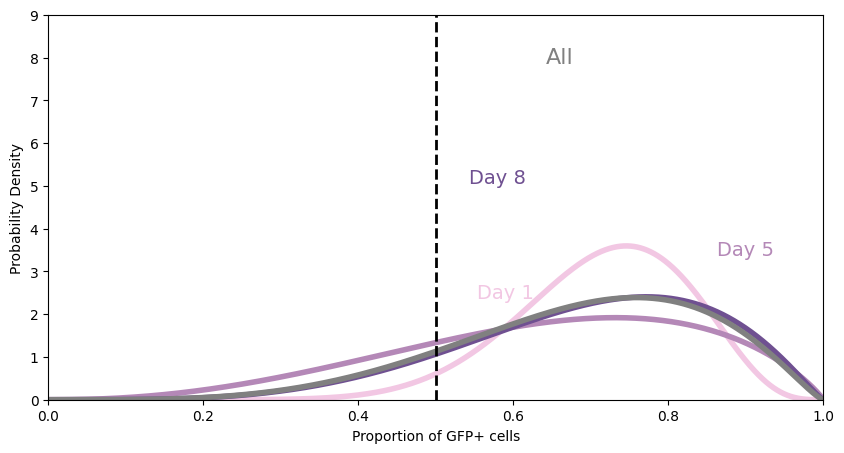

In [19]:
# Bell shape
x = np.linspace(0, 1, 10000)
yd1 = beta.pdf(x, to_plot[0][0], to_plot[0][1])
yd5 = beta.pdf(x, to_plot[1][0], to_plot[1][1])
yd8 = beta.pdf(x, to_plot[2][0], to_plot[2][1])

yall = beta.pdf(x, to_plot[3][0], to_plot[3][1])

#plt.title("PDF of the proportion of GFP+ cells out of all cells expressing a single allele", fontsize=20)

colors = ["#f2c7e3", "#b488b7", "#6f5091", "gray"]

#plt.title("PDF of proportion of GFP+/tdTomato+ cells out of the total", fontsize=20)
plt.xlabel("Proportion of GFP+ cells")
plt.ylabel("Probability Density")
plt.plot(x, yd1, linewidth=4, color=colors[0])
plt.annotate("Day 1", xy=(0.59, 2.5), size = 14, ha='center', va='center', color=colors[0])
plt.plot(x, yd5, linewidth=4, color=colors[1])
plt.annotate("Day 5", xy=(0.9, 3.5), size = 14, ha='center', va='center', color=colors[1])
plt.plot(x, yd8, linewidth=4, color=colors[2])
plt.annotate("Day 8", xy=(0.58, 5.2), size = 14, ha='center', va='center', color=colors[2])
plt.plot(x, yall, linewidth=4, color=colors[3])
plt.annotate("All", xy=(0.66, 8), size = 16, ha='center', va='center', color='gray')

plt.plot([0.5 for i in range(100)], np.linspace(0, 9, 100), linewidth=2, color='black', linestyle='dashed')

plt.xlim([0, 1])
plt.ylim([0, 9])
plt.show()

## Testing

Comparing observed distributions with the theoritical mean (0.5)

In [20]:
# GFP/(GFP+tdTomato)

gfpper = []
for i in [day1, day5, day8]:
  gfpper.append([i["GFP"][j]/(i["GFP"][j]+i["tdTomato"][j]) for j in range(len(i["GFP"]))])

print(gfpper)

[[0.8461538461538461, 0.6, 0.6153846153846154, 0.8], [0.9047619047619048, 0.6530612244897959, 0.36363636363636365, 0.6521739130434783], [0.5806526535826269, 0.8947368421052632, 0.730773816620961, 0.3500177493787718, 0.6409920114462858, 0.7837837837837838, 0.821917808219178, 0.7697599136768276]]


[Text(0, 0.5, 'Proportion of GFP+ cells')]

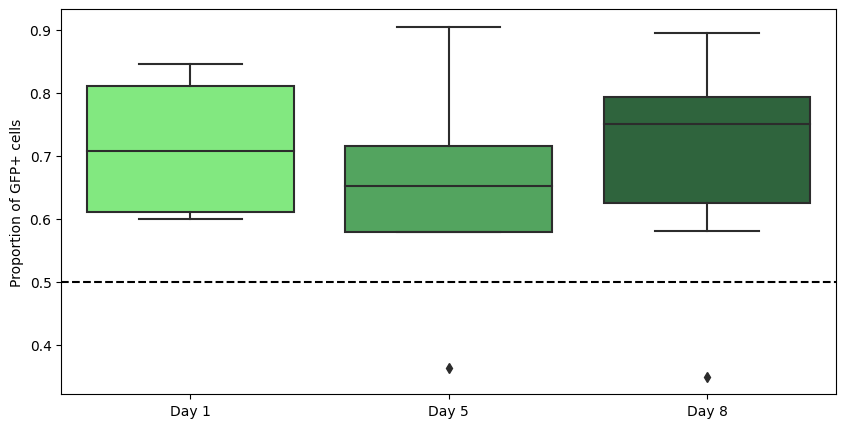

In [21]:
days = ["Day 1", "Day 5", "Day 8"]
fig, ax = plt.subplots()
sns.boxplot(gfpper, palette=["#71fa6e", "#46b155", "#266d39"])
plt.hlines(y=0.5, xmin=-0.5, xmax=2.5, colors="black", linestyles="--")
ax.set_xticklabels(days)
ax.set(ylabel="Proportion of GFP+ cells")

In [22]:
med0 = 0.5

allg = [alld["GFP"][i]/(alld["GFP"][i]+alld["tdTomato"][i]) for i in range(len(alld["GFP"]))]
print(allg)

stats, p = wilcoxon([allg[i] - med0 for i in range(len(allg))])

print('Statistics=%.3f, p=%.3f' % (stats, p))

print([allg[i] - med0
       for i in range(len(allg))])

[0.5806526535826269, 0.8947368421052632, 0.730773816620961, 0.3500177493787718, 0.6409920114462858, 0.7837837837837838, 0.821917808219178, 0.7697599136768276, 0.8461538461538461, 0.6, 0.6153846153846154, 0.8, 0.9047619047619048, 0.6530612244897959, 0.36363636363636365, 0.6521739130434783]
Statistics=10.000, p=0.001
[0.08065265358262685, 0.39473684210526316, 0.23077381662096097, -0.14998225062122822, 0.14099201144628581, 0.28378378378378377, 0.32191780821917804, 0.2697599136768276, 0.34615384615384615, 0.09999999999999998, 0.11538461538461542, 0.30000000000000004, 0.40476190476190477, 0.15306122448979587, -0.13636363636363635, 0.15217391304347827]


# ICM and TE inactivation bias

In [23]:
# % Inactivation (% active) bias
statxci, pxci = mannwhitneyu(day8_icm["Both"], day8_te["Both"])
print('Statistics=%.3f, p=%.3f' % (statxci, pxci))

Statistics=5.500, p=0.561


In [24]:
# GFP nactivation bias
tegfp = [day8_te["GFP"][j]/(day8_te["GFP"][j]+day8_te["tdTomato"][j]) for j in range(4)]
print(tegfp)
icmgfp = [day8_icm["GFP"][j]/(day8_icm["GFP"][j]+day8_icm["tdTomato"][j]) for j in range(4)]
print(icmgfp)


statgfp, pgfp = mannwhitneyu(tegfp, icmgfp)
print('Statistics=%.3f, p=%.3f' % (statgfp, pgfp))

[0.6409920114462858, 0.7837837837837838, 0.821917808219178, 0.7697599136768276]
[0.5806526535826269, 0.8947368421052632, 0.730773816620961, 0.3500177493787718]
Statistics=11.000, p=0.486


# Day vs Day: is the X chromosome being progressively inactivated?

If that is the case, we should a significant progressive decrease in the % of "Both" cells

## Plotting

In [25]:
to_plot3 = []
for i in [day1, day5, day8_icm, day8_te]:
  to_plot3.append([np.sum([i["Both"][j]/10 for j in range(4)]), np.sum([10 - (i["Both"][j]/10) for j in range(4)])])
to_plot3

[[25.4, 14.600000000000001],
 [23.3, 16.7],
 [6.950999999999999, 33.049],
 [7.673, 32.327]]

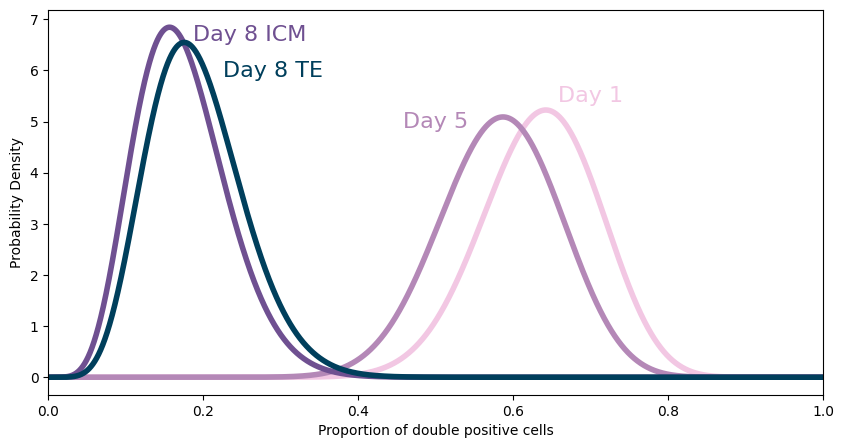

In [26]:
# Bell shape
x = np.linspace(0, 1, 10000)
yd1 = beta.pdf(x, to_plot3[0][0], to_plot3[0][1])
yd5 = beta.pdf(x, to_plot3[1][0], to_plot3[1][1])
yd8i = beta.pdf(x, to_plot3[2][0], to_plot3[2][1])
yd8t = beta.pdf(x, to_plot3[3][0], to_plot3[3][1])

colors = ["#f2c7e3", "#b488b7", "#6f5091", "#003f5c"]


#plt.title("PDF of proportion of GFP+/tdTomato+ cells out of the total", fontsize=20)
plt.xlabel("Proportion of double positive cells")
plt.ylabel("Probability Density")
plt.plot(x, yd1, linewidth=4, color=colors[0])
plt.annotate("Day 1", xy=(0.7, 5.5), size = 16, ha='center', va='center', color=colors[0])
plt.plot(x, yd5, linewidth=4, color=colors[1])
plt.annotate("Day 5", xy=(0.5, 5), size = 16, ha='center', va='center', color=colors[1])
plt.plot(x, yd8i, linewidth=4, color=colors[2])
plt.annotate("Day 8 ICM", xy=(0.26, 6.7), size = 16, ha='center', va='center', color=colors[2])
plt.plot(x, yd8t, linewidth=4, color=colors[3])
plt.annotate("Day 8 TE", xy=(0.29, 6), size = 16, ha='center', va='center', color=colors[3])


plt.xlim([0, 1])
plt.show()

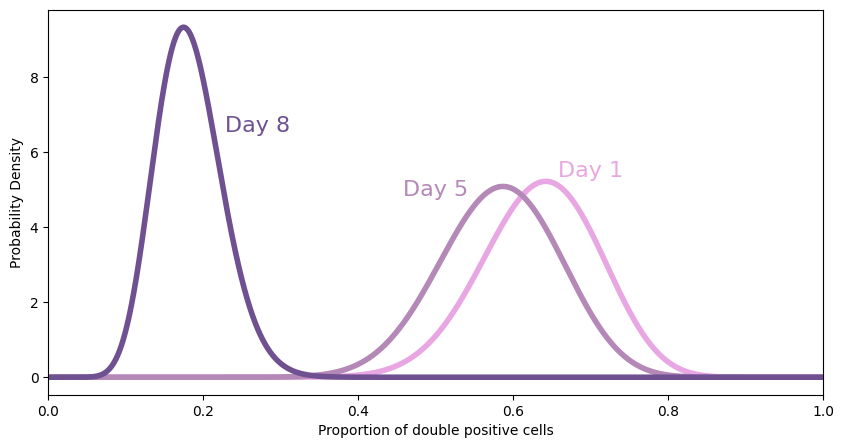

In [27]:
# Bell shape
x = np.linspace(0, 1, 10000)
yd1 = beta.pdf(x, to_plot3[0][0], to_plot3[0][1])
yd5 = beta.pdf(x, to_plot3[1][0], to_plot3[1][1])
yd8 = beta.pdf(x, to_plot3[2][0]+to_plot3[3][0], to_plot3[2][1]+to_plot3[3][1])

colors = ["#e8a7e2", "#b488b7", "#6f5091", "#003f5c"]

#plt.title("PDF of proportion of GFP+/tdTomato+ cells out of the total", fontsize=20)
plt.xlabel("Proportion of double positive cells")
plt.ylabel("Probability Density")
plt.plot(x, yd1, linewidth=4, color=colors[0])
plt.annotate("Day 1", xy=(0.7, 5.5), size = 16, ha='center', va='center', color=colors[0])
plt.plot(x, yd5, linewidth=4, color=colors[1])
plt.annotate("Day 5", xy=(0.5, 5), size = 16, ha='center', va='center', color=colors[1])
plt.plot(x, yd8, linewidth=4, color=colors[2])
plt.annotate("Day 8", xy=(0.27, 6.7), size = 16, ha='center', va='center', color=colors[2])


plt.xlim([0, 1])
plt.show()